# Triangle Counting
In this notebook we will test different parameters of the implemented algorithms for triangle counting. The algorithms will be tested for graph of various sizes.

In [36]:
import networkx as nx
import numpy as np
import exact as e
import doulion as d
import triest as t

from tqdm import tqdm

import time
import pickle
import matplotlib.pyplot as plt 

In [38]:
def nodeIter_test(g):
    start = time.process_time()
    n = e.node_iter(G=g)
    elapsed_time = time.process_time() - start
    
    return [elapsed_time, n]

def doulion_test(g):
    probabilities = [0.2, 0.4, 0.5, 0.6, 0.65, 0.69, 0.7, 0.73, 0.77, 0.8, 0.9]
    res = {}

    for p in tqdm(probabilities):
        start = time.process_time()
        n = d.DOULION_NodeIterator(G=g, p=p)

        elapsed_time = time.process_time() - start
        res[p] = [elapsed_time, n]
    
    return res

def triest_base_test(g, memory):
    res = {}

    for M in tqdm(memory):
        start = time.process_time()
        n = t.triest_base(G=g, M=M)

        elapsed_time = time.process_time() - start
        res[M] = [elapsed_time, n]
    
    return res

def triest_impr_test(g, memory):
    res = {}

    for M in tqdm(memory):
        start = time.process_time()
        n = t.triest_impr(G=g, M=M)

        elapsed_time = time.process_time() - start
        res[M] = [elapsed_time, n]
    
    return res

In [39]:
# small graph 
g = nx.read_edgelist(f"./data/email.txt", create_using=nx.Graph(), nodetype = int)
g.remove_edges_from(nx.selfloop_edges(g)) # removing self-loops (if any)

num_edges = g.number_of_edges()

percentages = [10, 25, 40, 50, 60, 70, 80, 90]
memory = [int(num_edges * p / 100) for p in percentages]

node_iter_res_s = nodeIter_test(g=g)
doulion_res_s = doulion_test(g=g)
t_base_res_s = triest_base_test(g=g, memory=memory)
t_impr_res_s = triest_impr_test(g=g, memory=memory)

100%|██████████| 8/8 [01:16<00:00,  9.51s/it]


In [ ]:
# medium graph 
g = nx.read_edgelist(f"./data/astroph.txt", create_using=nx.Graph(), nodetype = int)
g.remove_edges_from(nx.selfloop_edges(g)) # removing self-loops (if any)

num_edges = g.number_of_edges()

percentages = [10, 25, 40, 50, 60, 70, 80, 90]
memory = [int(num_edges * p / 100) for p in percentages]

node_iter_res_m = nodeIter_test(g=g)
doulion_res_m = doulion_test(g=g)
t_base_res_m = triest_base_test(g=g, memory=memory)
t_impr_res_m = triest_impr_test(g=g, memory=memory)

In [6]:
# big graph 
g = nx.read_edgelist(f"./data/roadpa.txt", create_using=nx.Graph(), nodetype = int)
g.remove_edges_from(nx.selfloop_edges(g)) # removing self-loops (if any)

num_edges = g.number_of_edges()

percentages = [10, 25, 40, 50, 60, 70, 80, 90]
memory = [int(num_edges * p / 100) for p in percentages]

node_iter_res_b = tqdm(nodeIter_test(g=g))
doulion_res_b = tqdm(doulion_test(g=g))
t_base_res_b = tqdm(triest_base_test(g=g, memory=memory))
t_impr_res_b = tqdm(triest_impr_test(g=g, memory=memory))

In [7]:
# small
with open('node_iter_res_s.pkl', 'wb') as file:
    pickle.dump(node_iter_res_s, file)

with open('doulion_res_s.pkl', 'wb') as file:
    pickle.dump(doulion_res_s, file)

with open('t_base_res_s.pkl', 'wb') as file:
    pickle.dump(t_base_res_s, file)

with open('t_impr_res_s.pkl', 'wb') as file:
    pickle.dump(t_impr_res_s, file)

# med
with open('node_iter_res_m.pkl', 'wb') as file:
    pickle.dump(node_iter_res_m, file)

with open('doulion_res_m.pkl', 'wb') as file:
    pickle.dump(doulion_res_m, file)

with open('t_base_res_m.pkl', 'wb') as file:
    pickle.dump(t_base_res_m, file)

with open('t_impr_res_m.pkl', 'wb') as file:
    pickle.dump(t_impr_res_m, file)   

# big
with open('node_iter_res_b.pkl', 'wb') as file:
    pickle.dump(node_iter_res_b, file)

with open('doulion_res_b.pkl', 'wb') as file:
    pickle.dump(doulion_res_b, file)

with open('t_base_res_b.pkl', 'wb') as file:
    pickle.dump(t_base_res_b, file)

with open('t_impr_res_b.pkl', 'wb') as file:
    pickle.dump(t_impr_res_b, file)

In [8]:
# small
with open('node_iter_res_s.pkl', 'rb') as file:
    loaded_node_iter_res_s = pickle.load(file)

with open('doulion_res_s.pkl', 'rb') as file:
    loaded_doulion_res_s = pickle.load(file)

with open('t_base_res_s.pkl', 'rb') as file:
    loaded_t_base_res_s = pickle.load(file)

with open('t_impr_res_s.pkl', 'rb') as file:
    loaded_t_impr_res_s = pickle.load(file)

# med
    
with open('node_iter_res_m.pkl', 'rb') as file:
    loaded_node_iter_res_m = pickle.load(file)

with open('doulion_res_m.pkl', 'rb') as file:
    loaded_doulion_res_m = pickle.load(file)

with open('t_base_res_m.pkl', 'rb') as file:
    loaded_t_base_res_m = pickle.load(file)

with open('t_impr_res_m.pkl', 'rb') as file:
    loaded_t_impr_res_m = pickle.load(file)

# big
    
with open('node_iter_res_b.pkl', 'rb') as file:
    loaded_node_iter_res_b = pickle.load(file)

with open('doulion_res_b.pkl', 'rb') as file:
    loaded_doulion_res_b = pickle.load(file)

with open('t_base_res_b.pkl', 'rb') as file:
    loaded_t_base_res_b = pickle.load(file)

with open('t_impr_res_b.pkl', 'rb') as file:
    loaded_t_impr_res_b = pickle.load(file)    


In [9]:
"""# small
with open('./data/pickle_data/node_iter_res_s.pkl', 'rb') as file:
    loaded_node_iter_res_s = pickle.load(file)

with open('./data/pickle_data/doulion_res_s.pkl', 'rb') as file:
    loaded_doulion_res_s = pickle.load(file)

with open('./data/pickle_data/t_base_res_s.pkl', 'rb') as file:
    loaded_t_base_res_s = pickle.load(file)

with open('./data/pickle_data/t_impr_res_s.pkl', 'rb') as file:
    loaded_t_impr_res_s = pickle.load(file)

# med
    
with open('./data/pickle_data/node_iter_res_m.pkl', 'rb') as file:
    loaded_node_iter_res_m = pickle.load(file)

with open('./data/pickle_data/doulion_res_m.pkl', 'rb') as file:
    loaded_doulion_res_m = pickle.load(file)

with open('./data/pickle_data/t_base_res_m.pkl', 'rb') as file:
    loaded_t_base_res_m = pickle.load(file)

with open('./data/pickle_data/t_impr_res_m.pkl', 'rb') as file:
    loaded_t_impr_res_m = pickle.load(file)

# big
    
with open('./data/pickle_data/node_iter_res_b.pkl', 'rb') as file:
    loaded_node_iter_res_b = pickle.load(file)

with open('./data/pickle_data/doulion_res_b.pkl', 'rb') as file:
    loaded_doulion_res_b = pickle.load(file)

with open('./data/pickle_data/t_base_res_b.pkl', 'rb') as file:
    loaded_t_base_res_b = pickle.load(file)

with open('./data/pickle_data/t_impr_res_b.pkl', 'rb') as file:
    loaded_t_impr_res_b = pickle.load(file)    
"""

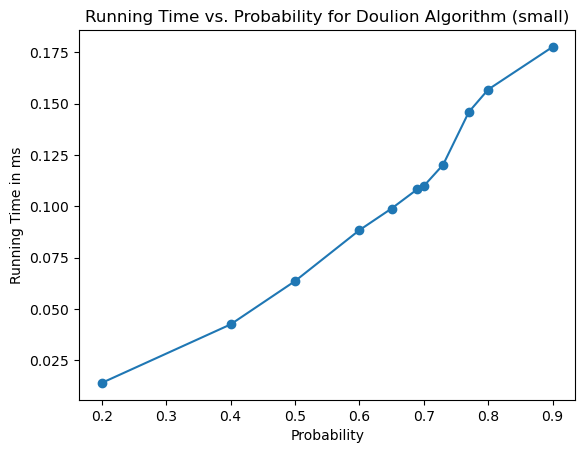

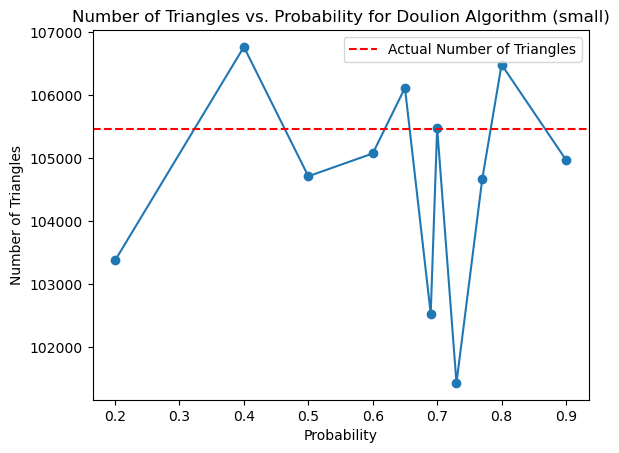

In [9]:
probabilities = list(loaded_doulion_res_s.keys())
running_times = [entry[0] for entry in loaded_doulion_res_s.values()]

plt.plot(probabilities, running_times, marker='o')
plt.xlabel('Probability')
plt.ylabel('Running Time in ms')
plt.title('Running Time vs. Probability for Doulion Algorithm (small)')
plt.show()

actual_triangles = 105461

probabilities = list(loaded_doulion_res_s.keys())
num_triangles_predicted = [int(entry[1]) for entry in loaded_doulion_res_s.values()]

plt.plot(probabilities, num_triangles_predicted, marker='o')
plt.axhline(y=actual_triangles, color='red', linestyle='--', label='Actual Number of Triangles')

plt.xlabel('Probability')
plt.ylabel('Number of Triangles')
plt.title('Number of Triangles vs. Probability for Doulion Algorithm (small)')
plt.legend()
plt.show()

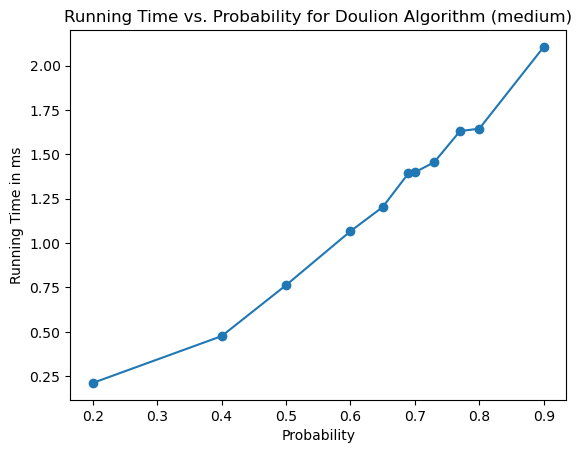

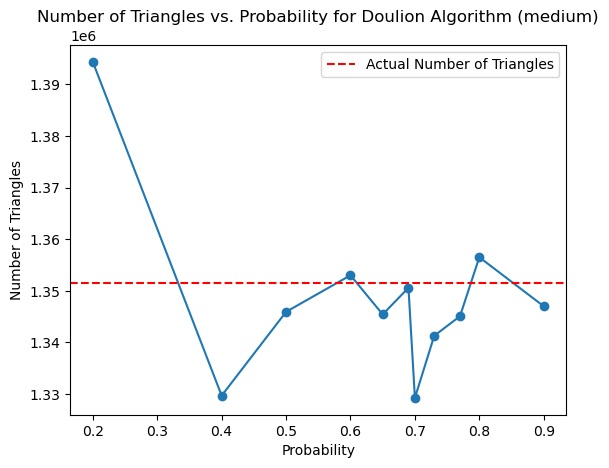

In [10]:
probabilities = list(loaded_doulion_res_m.keys())
running_times = [entry[0] for entry in loaded_doulion_res_m.values()]

plt.plot(probabilities, running_times, marker='o')
plt.xlabel('Probability')
plt.ylabel('Running Time in ms')
plt.title('Running Time vs. Probability for Doulion Algorithm (medium)')
plt.show()

actual_triangles = 1351441

probabilities = list(loaded_doulion_res_m.keys())
num_triangles_predicted = [int(entry[1]) for entry in loaded_doulion_res_m.values()]

plt.plot(probabilities, num_triangles_predicted, marker='o')
plt.axhline(y=actual_triangles, color='red', linestyle='--', label='Actual Number of Triangles')

plt.xlabel('Probability')
plt.ylabel('Number of Triangles')
plt.title('Number of Triangles vs. Probability for Doulion Algorithm (medium)')
plt.legend()
plt.show()

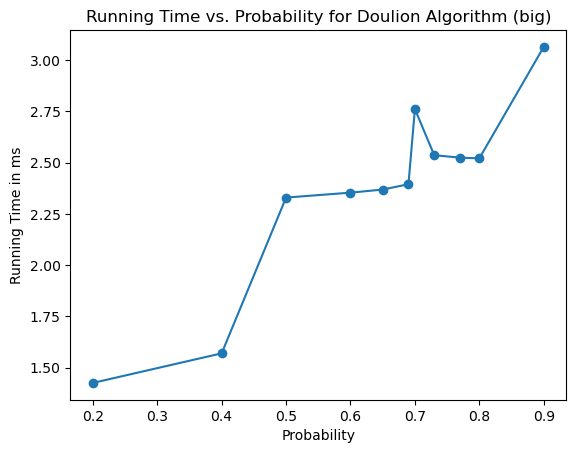

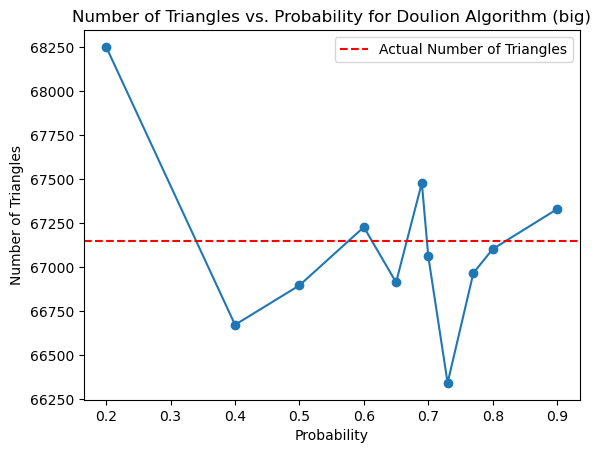

In [11]:
probabilities = list(loaded_doulion_res_b.keys())
running_times = [entry[0] for entry in loaded_doulion_res_b.values()]

plt.plot(probabilities, running_times, marker='o')
plt.xlabel('Probability')
plt.ylabel('Running Time in ms')
plt.title('Running Time vs. Probability for Doulion Algorithm (big)')
plt.show()

actual_triangles = 67150

probabilities = list(loaded_doulion_res_b.keys())
num_triangles_predicted = [int(entry[1]) for entry in loaded_doulion_res_b.values()]

plt.plot(probabilities, num_triangles_predicted, marker='o')
plt.axhline(y=actual_triangles, color='red', linestyle='--', label='Actual Number of Triangles')

plt.xlabel('Probability')
plt.ylabel('Number of Triangles')
plt.title('Number of Triangles vs. Probability for Doulion Algorithm (big)')
plt.legend()
plt.show()

# Triest

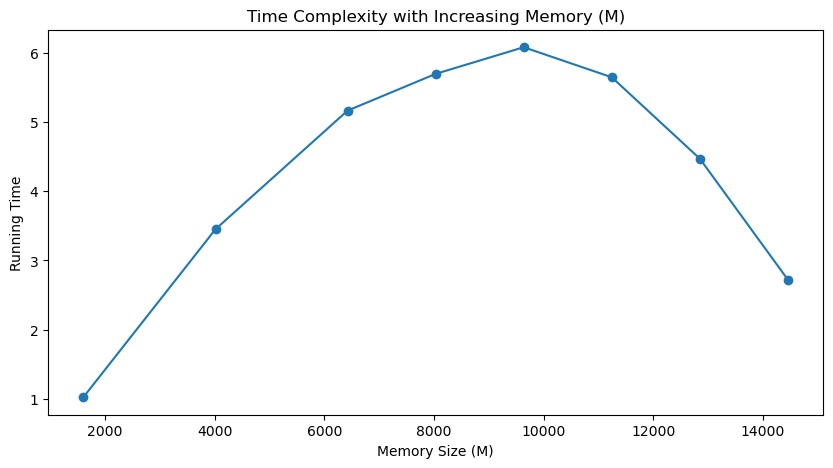

In [12]:
memory_sizes = list(loaded_t_base_res_s.keys())
running_times = [entry[0] for entry in loaded_t_base_res_s.values()]

plt.figure(figsize=(10, 5))
plt.plot(memory_sizes, running_times, marker='o')
plt.title('Time Complexity with Increasing Memory (M)')
plt.xlabel('Memory Size (M)')
plt.ylabel('Running Time')
plt.show()


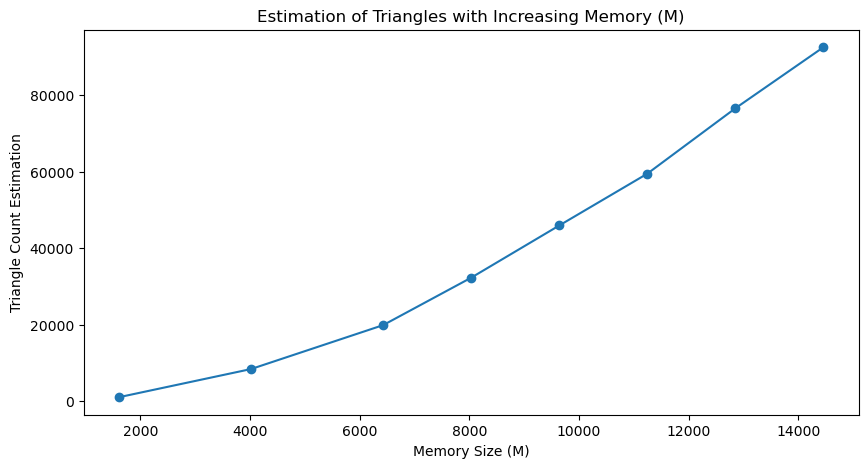

In [13]:
triangle_estimations = [entry[1] for entry in loaded_t_base_res_s.values()]

plt.figure(figsize=(10, 5))
plt.plot(memory_sizes, triangle_estimations, marker='o')
plt.title('Estimation of Triangles with Increasing Memory (M)')
plt.xlabel('Memory Size (M)')
plt.ylabel('Triangle Count Estimation')
plt.show()

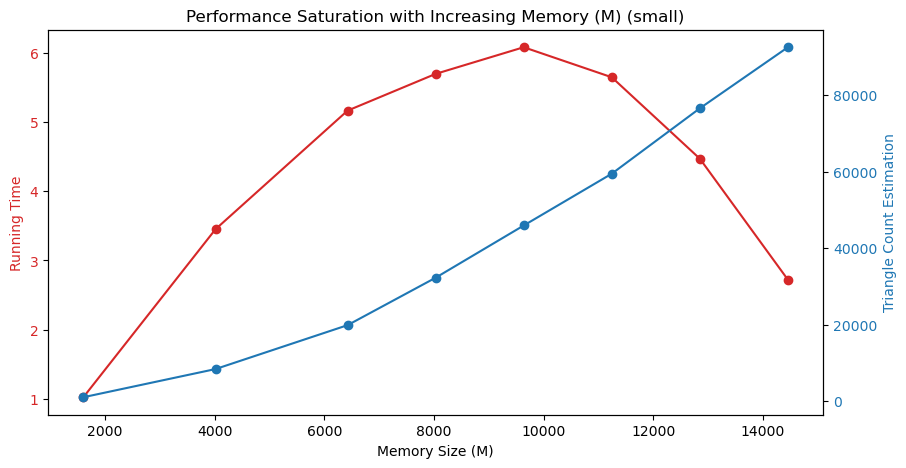

In [14]:
memory_sizes = list(loaded_t_base_res_s.keys())
running_times = [entry[0] for entry in loaded_t_base_res_s.values()]
triangle_estimations = [entry[1] for entry in loaded_t_base_res_s.values()]

fig, ax1 = plt.subplots(figsize=(10, 5))

color = 'tab:red'
ax1.set_xlabel('Memory Size (M)')
ax1.set_ylabel('Running Time', color=color)
ax1.plot(memory_sizes, running_times, color=color, marker='o')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Triangle Count Estimation', color=color)
ax2.plot(memory_sizes, triangle_estimations, color=color, marker='o')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Performance Saturation with Increasing Memory (M) (small)')
plt.show()

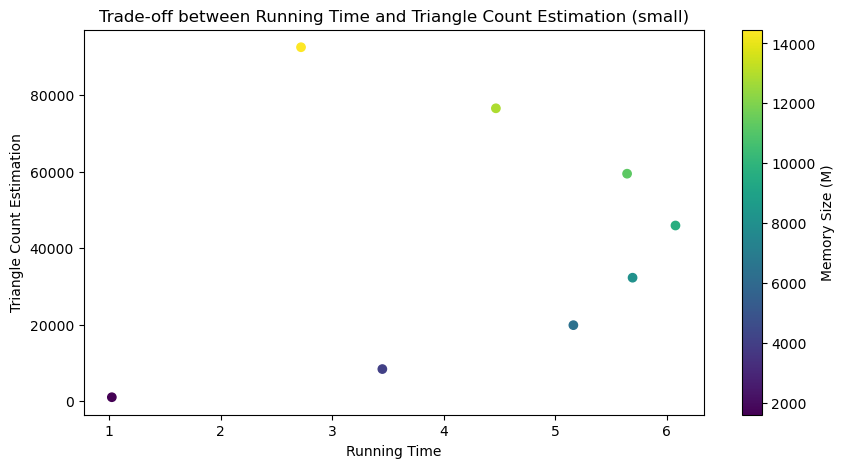

In [15]:
plt.figure(figsize=(10, 5))
plt.scatter(running_times, triangle_estimations, c=memory_sizes, cmap='viridis', marker='o')
plt.title('Trade-off between Running Time and Triangle Count Estimation (small)')
plt.xlabel('Running Time')
plt.ylabel('Triangle Count Estimation')
plt.colorbar(label='Memory Size (M)')
plt.show()

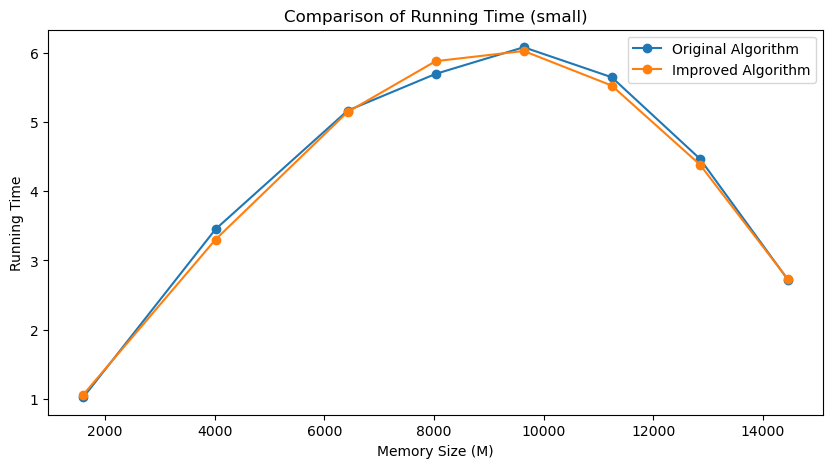

In [16]:
memory_sizes = list(loaded_t_base_res_s.keys())

plt.figure(figsize=(10, 5))
plt.plot(memory_sizes, [entry[0] for entry in loaded_t_base_res_s.values()], label='Original Algorithm', marker='o')
plt.plot(memory_sizes, [entry[0] for entry in loaded_t_impr_res_s.values()], label='Improved Algorithm', marker='o')
plt.title('Comparison of Running Time (small)')
plt.xlabel('Memory Size (M)')
plt.ylabel('Running Time')
plt.legend()
plt.show()

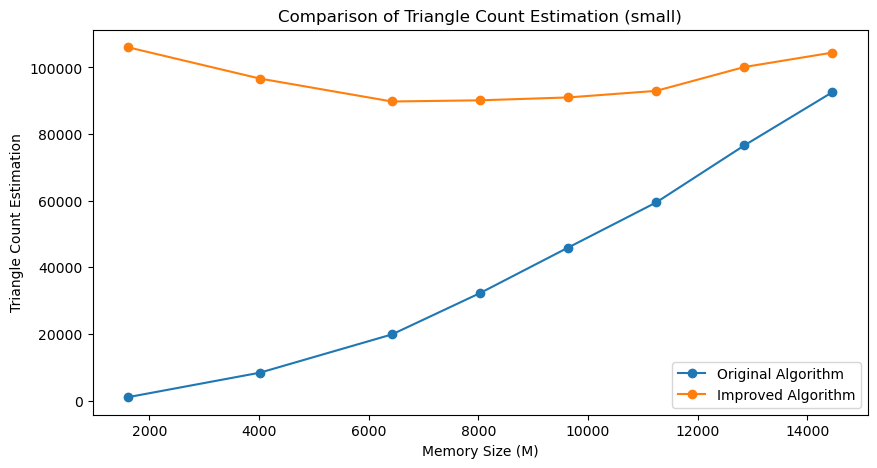

In [17]:
plt.figure(figsize=(10, 5))
plt.plot(memory_sizes, [entry[1] for entry in loaded_t_base_res_s.values()], label='Original Algorithm', marker='o')
plt.plot(memory_sizes, [entry[1] for entry in loaded_t_impr_res_s.values()], label='Improved Algorithm', marker='o')
plt.title('Comparison of Triangle Count Estimation (small)')
plt.xlabel('Memory Size (M)')
plt.ylabel('Triangle Count Estimation')
plt.legend()
plt.show()

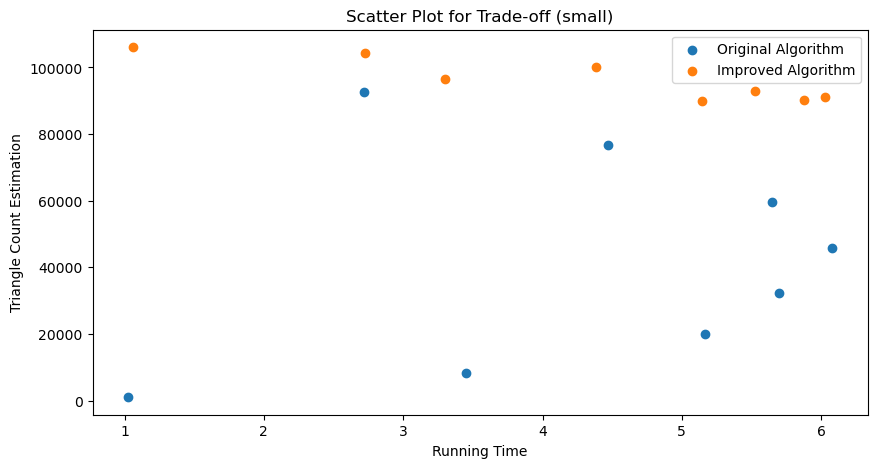

In [18]:
plt.figure(figsize=(10, 5))
plt.scatter([entry[0] for entry in loaded_t_base_res_s.values()], [entry[1] for entry in loaded_t_base_res_s.values()], label='Original Algorithm', marker='o')
plt.scatter([entry[0] for entry in loaded_t_impr_res_s.values()], [entry[1] for entry in loaded_t_impr_res_s.values()], label='Improved Algorithm', marker='o')
plt.title('Scatter Plot for Trade-off (small)')
plt.xlabel('Running Time')
plt.ylabel('Triangle Count Estimation')
plt.legend()
plt.show()

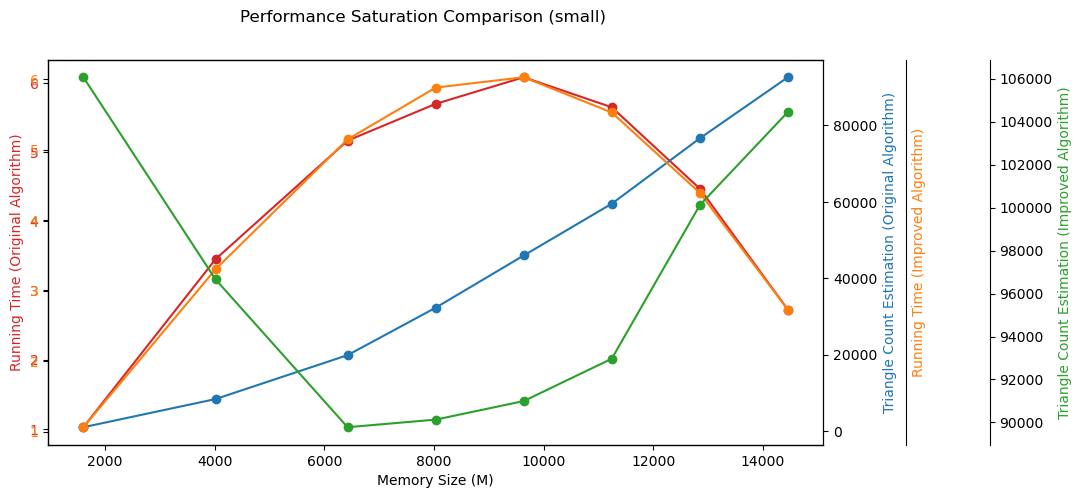

In [19]:
fig, ax1 = plt.subplots(figsize=(10, 5))
ax1.plot(memory_sizes, [entry[0] for entry in loaded_t_base_res_s.values()], label='Original Algorithm - Running Time', marker='o', color='tab:red')
ax1.tick_params(axis='y', labelcolor='tab:red')
ax1.set_xlabel('Memory Size (M)')
ax1.set_ylabel('Running Time (Original Algorithm)', color='tab:red')
ax2 = ax1.twinx()
ax2.plot(memory_sizes, [entry[1] for entry in loaded_t_base_res_s.values()], label='Original Algorithm - Triangle Count', marker='o', color='tab:blue')
ax2.set_ylabel('Triangle Count Estimation (Original Algorithm)', color='tab:blue')

ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))
ax3.plot(memory_sizes, [entry[0] for entry in loaded_t_impr_res_s.values()], label='Improved Algorithm - Running Time', marker='o', color='tab:orange')
ax3.tick_params(axis='y', labelcolor='tab:orange')
ax3.set_ylabel('Running Time (Improved Algorithm)', color='tab:orange')
ax4 = ax3.twinx()
ax4.spines['right'].set_position(('outward', 120))
ax4.plot(memory_sizes, [entry[1] for entry in loaded_t_impr_res_s.values()], label='Improved Algorithm - Triangle Count', marker='o', color='tab:green')
ax4.set_ylabel('Triangle Count Estimation (Improved Algorithm)', color='tab:green')

fig.suptitle('Performance Saturation Comparison (small)')
plt.show()

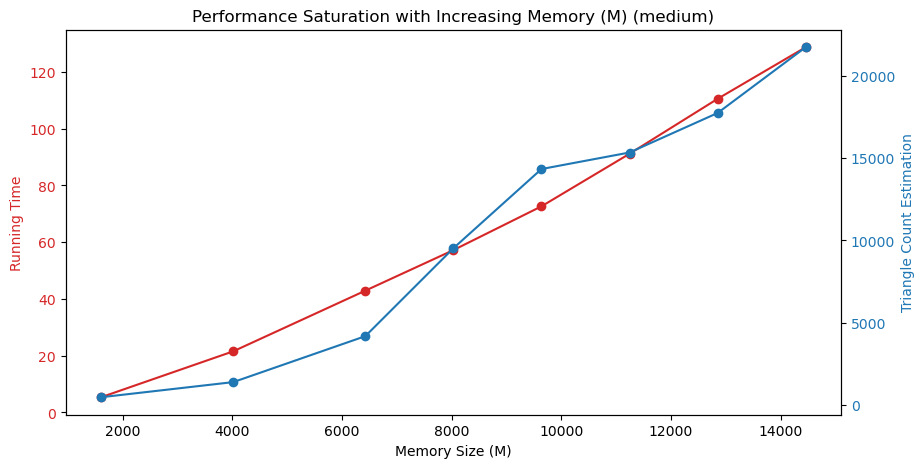

In [20]:
memory_sizes = list(loaded_t_base_res_m.keys())
running_times = [entry[0] for entry in loaded_t_base_res_m.values()]
triangle_estimations = [entry[1] for entry in loaded_t_base_res_m.values()]

fig, ax1 = plt.subplots(figsize=(10, 5))

color = 'tab:red'
ax1.set_xlabel('Memory Size (M)')
ax1.set_ylabel('Running Time', color=color)
ax1.plot(memory_sizes, running_times, color=color, marker='o')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Triangle Count Estimation', color=color)
ax2.plot(memory_sizes, triangle_estimations, color=color, marker='o')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Performance Saturation with Increasing Memory (M) (medium)')
plt.show()

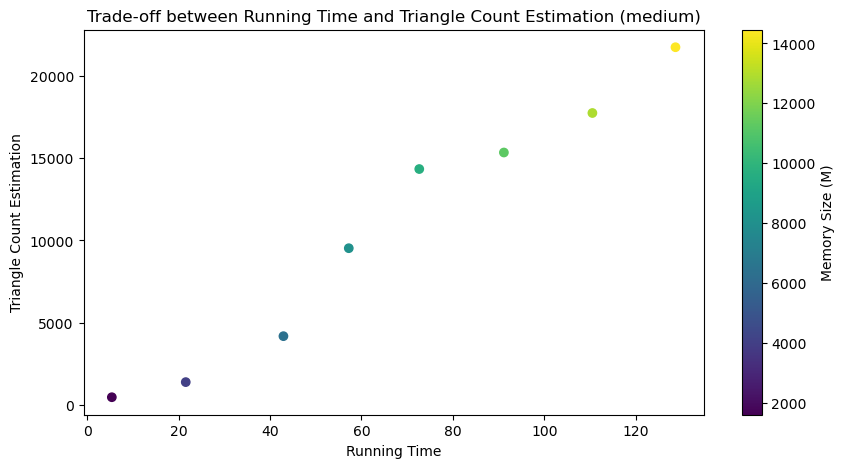

In [21]:
plt.figure(figsize=(10, 5))
plt.scatter(running_times, triangle_estimations, c=memory_sizes, cmap='viridis', marker='o')
plt.title('Trade-off between Running Time and Triangle Count Estimation (medium)')
plt.xlabel('Running Time')
plt.ylabel('Triangle Count Estimation')
plt.colorbar(label='Memory Size (M)')
plt.show()

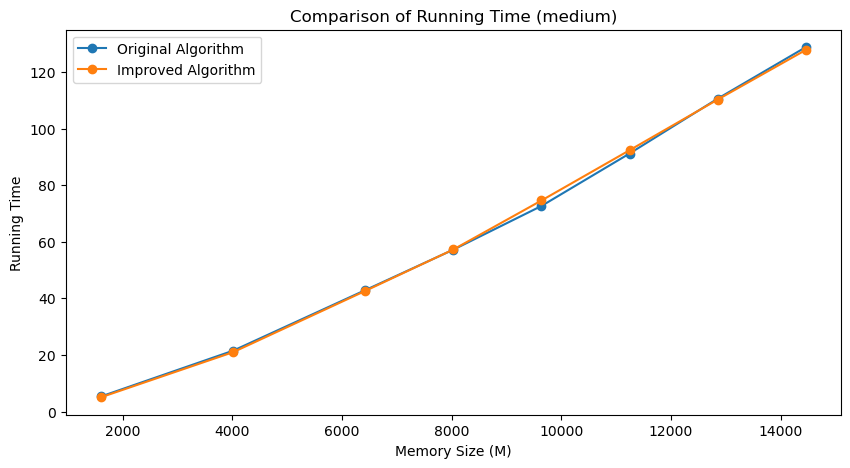

In [22]:
memory_sizes = list(loaded_t_base_res_m.keys())

plt.figure(figsize=(10, 5))
plt.plot(memory_sizes, [entry[0] for entry in loaded_t_base_res_m.values()], label='Original Algorithm', marker='o')
plt.plot(memory_sizes, [entry[0] for entry in loaded_t_impr_res_m.values()], label='Improved Algorithm', marker='o')
plt.title('Comparison of Running Time (medium)')
plt.xlabel('Memory Size (M)')
plt.ylabel('Running Time')
plt.legend()
plt.show()

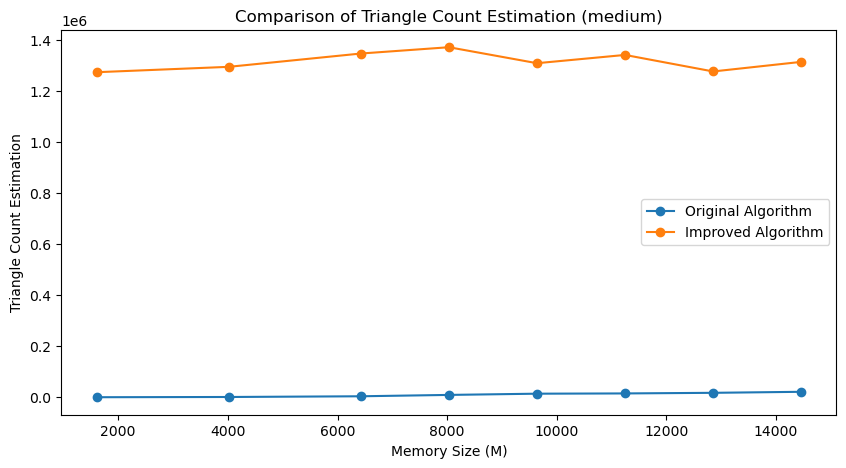

In [23]:
plt.figure(figsize=(10, 5))
plt.plot(memory_sizes, [entry[1] for entry in loaded_t_base_res_m.values()], label='Original Algorithm', marker='o')
plt.plot(memory_sizes, [entry[1] for entry in loaded_t_impr_res_m.values()], label='Improved Algorithm', marker='o')
plt.title('Comparison of Triangle Count Estimation (medium)')
plt.xlabel('Memory Size (M)')
plt.ylabel('Triangle Count Estimation')
plt.legend()
plt.show()

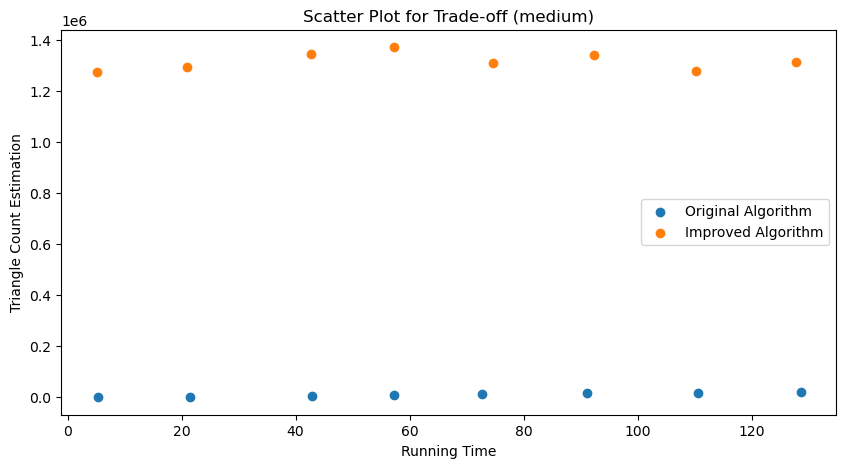

In [24]:
plt.figure(figsize=(10, 5))
plt.scatter([entry[0] for entry in loaded_t_base_res_m.values()], [entry[1] for entry in loaded_t_base_res_m.values()], label='Original Algorithm', marker='o')
plt.scatter([entry[0] for entry in loaded_t_impr_res_m.values()], [entry[1] for entry in loaded_t_impr_res_m.values()], label='Improved Algorithm', marker='o')
plt.title('Scatter Plot for Trade-off (medium)')
plt.xlabel('Running Time')
plt.ylabel('Triangle Count Estimation')
plt.legend()
plt.show()

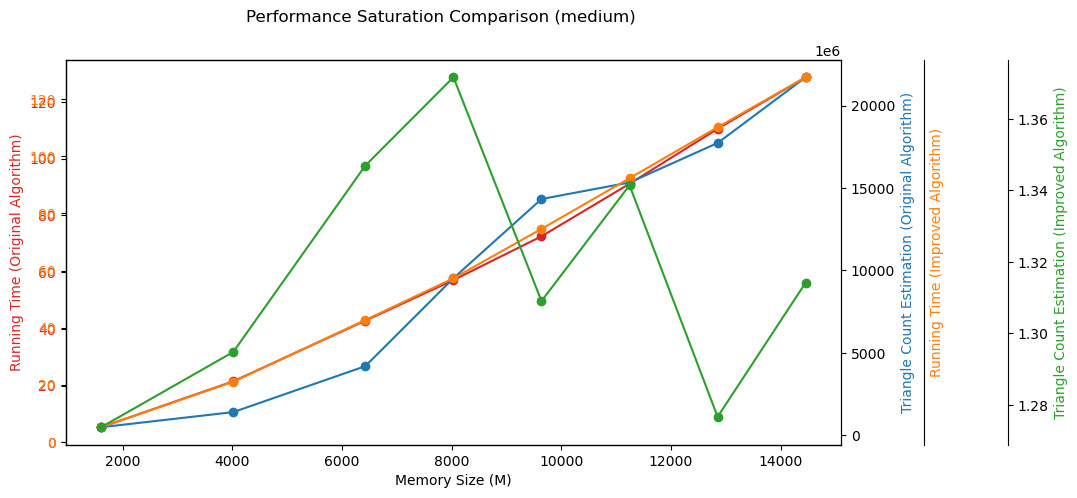

In [25]:
fig, ax1 = plt.subplots(figsize=(10, 5))
ax1.plot(memory_sizes, [entry[0] for entry in loaded_t_base_res_m.values()], label='Original Algorithm - Running Time', marker='o', color='tab:red')
ax1.tick_params(axis='y', labelcolor='tab:red')
ax1.set_xlabel('Memory Size (M)')
ax1.set_ylabel('Running Time (Original Algorithm)', color='tab:red')
ax2 = ax1.twinx()
ax2.plot(memory_sizes, [entry[1] for entry in loaded_t_base_res_m.values()], label='Original Algorithm - Triangle Count', marker='o', color='tab:blue')
ax2.set_ylabel('Triangle Count Estimation (Original Algorithm)', color='tab:blue')

ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))
ax3.plot(memory_sizes, [entry[0] for entry in loaded_t_impr_res_m.values()], label='Improved Algorithm - Running Time', marker='o', color='tab:orange')
ax3.tick_params(axis='y', labelcolor='tab:orange')
ax3.set_ylabel('Running Time (Improved Algorithm)', color='tab:orange')
ax4 = ax3.twinx()
ax4.spines['right'].set_position(('outward', 120))
ax4.plot(memory_sizes, [entry[1] for entry in loaded_t_impr_res_m.values()], label='Improved Algorithm - Triangle Count', marker='o', color='tab:green')
ax4.set_ylabel('Triangle Count Estimation (Improved Algorithm)', color='tab:green')

fig.suptitle('Performance Saturation Comparison (medium)')
plt.show()

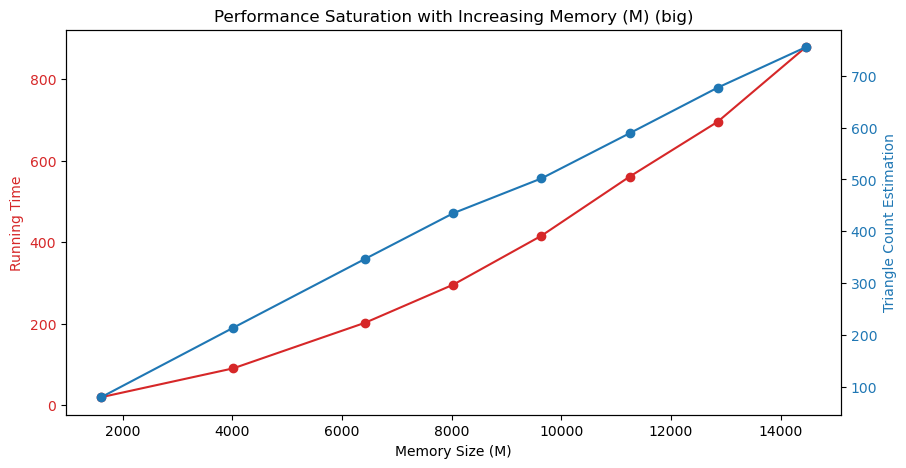

In [26]:
memory_sizes = list(loaded_t_base_res_b.keys())
running_times = [entry[0] for entry in loaded_t_base_res_b.values()]
triangle_estimations = [entry[1] for entry in loaded_t_base_res_b.values()]

fig, ax1 = plt.subplots(figsize=(10, 5))

color = 'tab:red'
ax1.set_xlabel('Memory Size (M)')
ax1.set_ylabel('Running Time', color=color)
ax1.plot(memory_sizes, running_times, color=color, marker='o')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Triangle Count Estimation', color=color)
ax2.plot(memory_sizes, triangle_estimations, color=color, marker='o')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Performance Saturation with Increasing Memory (M) (big)')
plt.show()

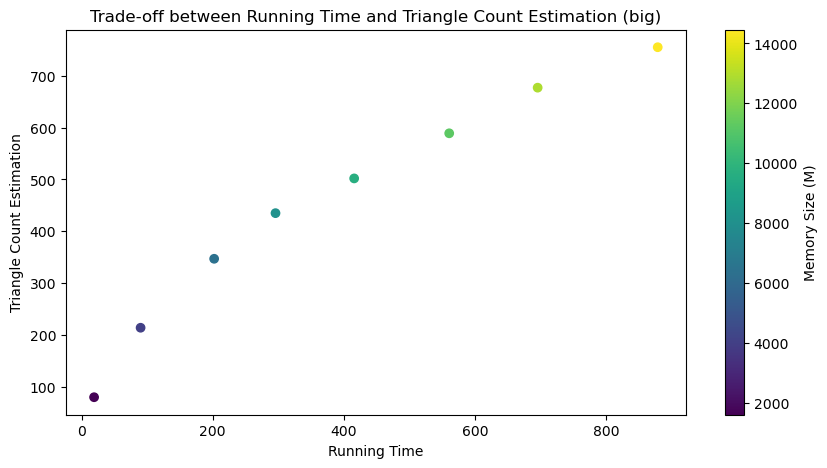

In [27]:
plt.figure(figsize=(10, 5))
plt.scatter(running_times, triangle_estimations, c=memory_sizes, cmap='viridis', marker='o')
plt.title('Trade-off between Running Time and Triangle Count Estimation (big)')
plt.xlabel('Running Time')
plt.ylabel('Triangle Count Estimation')
plt.colorbar(label='Memory Size (M)')
plt.show()

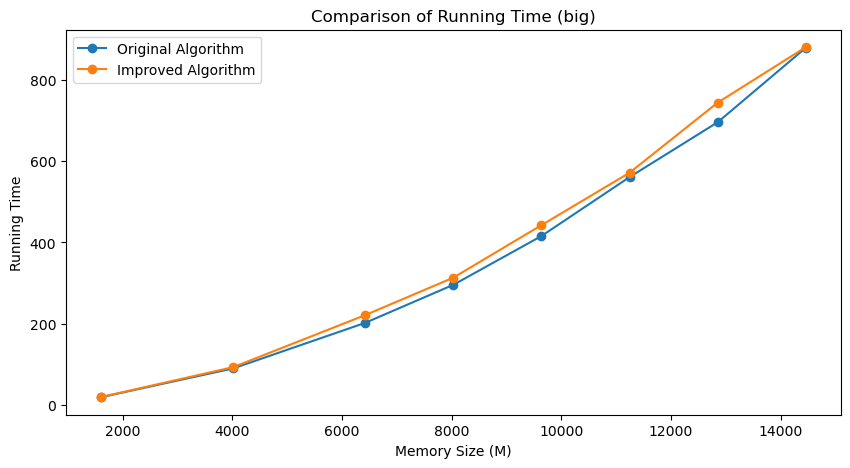

In [28]:
memory_sizes = list(loaded_t_base_res_b.keys())

plt.figure(figsize=(10, 5))
plt.plot(memory_sizes, [entry[0] for entry in loaded_t_base_res_b.values()], label='Original Algorithm', marker='o')
plt.plot(memory_sizes, [entry[0] for entry in loaded_t_impr_res_b.values()], label='Improved Algorithm', marker='o')
plt.title('Comparison of Running Time (big)')
plt.xlabel('Memory Size (M)')
plt.ylabel('Running Time')
plt.legend()
plt.show()

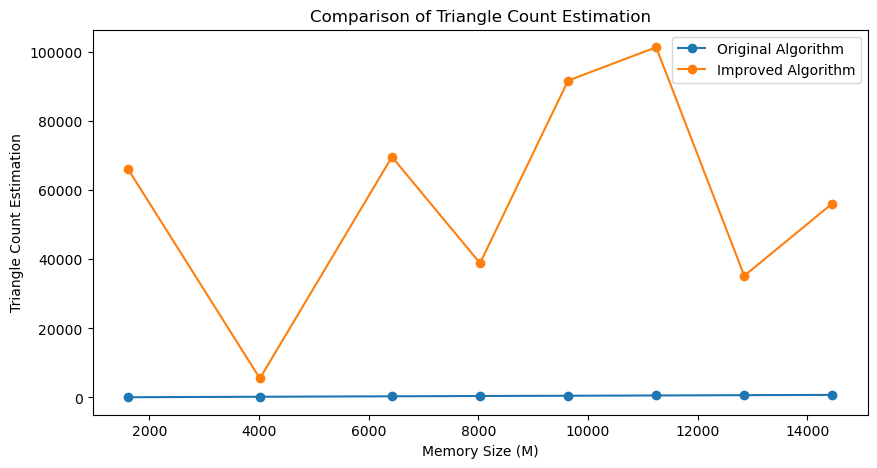

In [29]:
plt.figure(figsize=(10, 5))
plt.plot(memory_sizes, [entry[1] for entry in loaded_t_base_res_b.values()], label='Original Algorithm', marker='o')
plt.plot(memory_sizes, [entry[1] for entry in loaded_t_impr_res_b.values()], label='Improved Algorithm', marker='o')
plt.title('Comparison of Triangle Count Estimation')
plt.xlabel('Memory Size (M)')
plt.ylabel('Triangle Count Estimation')
plt.legend()
plt.show()

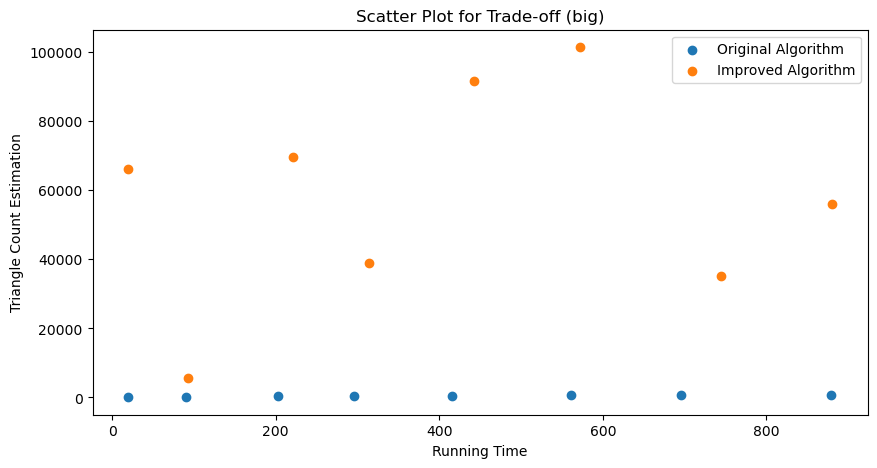

In [30]:
plt.figure(figsize=(10, 5))
plt.scatter([entry[0] for entry in loaded_t_base_res_b.values()], [entry[1] for entry in loaded_t_base_res_b.values()], label='Original Algorithm', marker='o')
plt.scatter([entry[0] for entry in loaded_t_impr_res_b.values()], [entry[1] for entry in loaded_t_impr_res_b.values()], label='Improved Algorithm', marker='o')
plt.title('Scatter Plot for Trade-off (big)')
plt.xlabel('Running Time')
plt.ylabel('Triangle Count Estimation')
plt.legend()
plt.show()

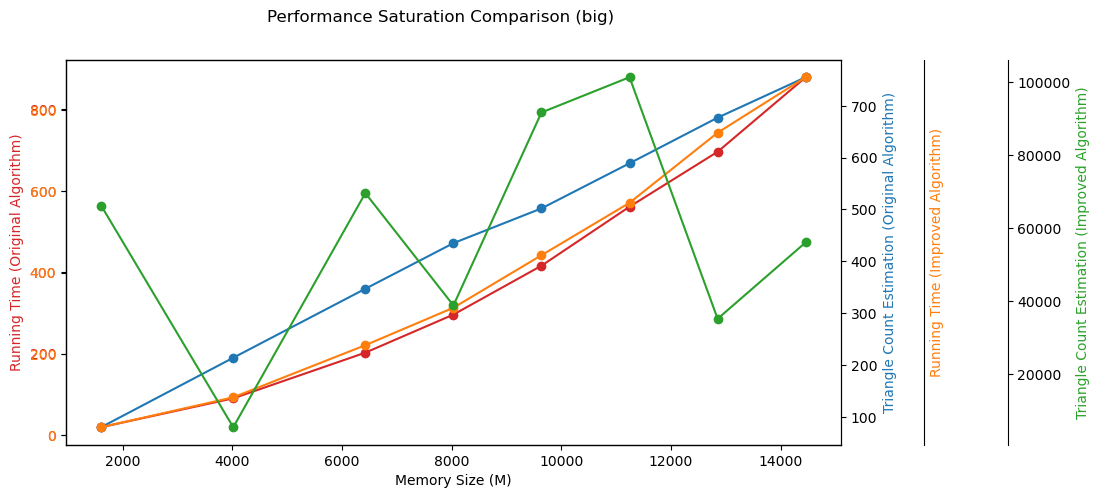

In [31]:
fig, ax1 = plt.subplots(figsize=(10, 5))
ax1.plot(memory_sizes, [entry[0] for entry in loaded_t_base_res_b.values()], label='Original Algorithm - Running Time', marker='o', color='tab:red')
ax1.tick_params(axis='y', labelcolor='tab:red')
ax1.set_xlabel('Memory Size (M)')
ax1.set_ylabel('Running Time (Original Algorithm)', color='tab:red')
ax2 = ax1.twinx()
ax2.plot(memory_sizes, [entry[1] for entry in loaded_t_base_res_b.values()], label='Original Algorithm - Triangle Count', marker='o', color='tab:blue')
ax2.set_ylabel('Triangle Count Estimation (Original Algorithm)', color='tab:blue')

ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))
ax3.plot(memory_sizes, [entry[0] for entry in loaded_t_impr_res_b.values()], label='Improved Algorithm - Running Time', marker='o', color='tab:orange')
ax3.tick_params(axis='y', labelcolor='tab:orange')
ax3.set_ylabel('Running Time (Improved Algorithm)', color='tab:orange')
ax4 = ax3.twinx()
ax4.spines['right'].set_position(('outward', 120))
ax4.plot(memory_sizes, [entry[1] for entry in loaded_t_impr_res_b.values()], label='Improved Algorithm - Triangle Count', marker='o', color='tab:green')
ax4.set_ylabel('Triangle Count Estimation (Improved Algorithm)', color='tab:green')

fig.suptitle('Performance Saturation Comparison (big)')
plt.show()

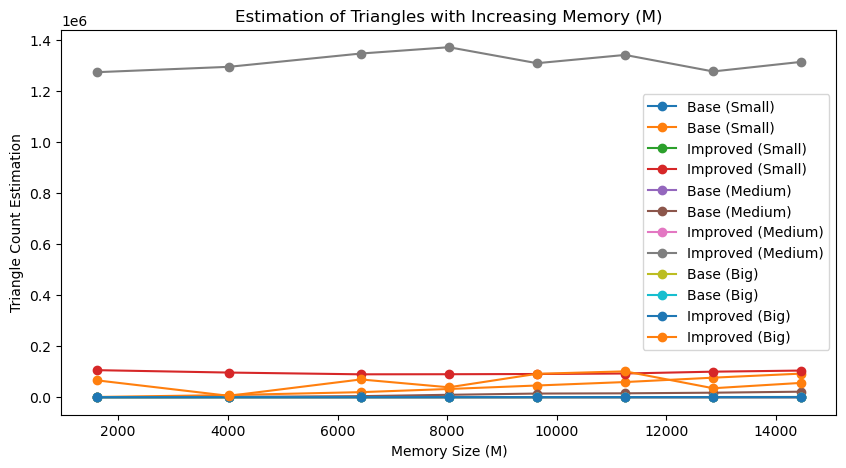

In [32]:
# Find the common memory sizes among all datasets
common_memory_sizes = set(memory_sizes)

for data in [loaded_t_base_res_s, loaded_t_impr_res_s,
             loaded_t_base_res_m, loaded_t_impr_res_m,
             loaded_t_base_res_b, loaded_t_impr_res_b]:
    common_memory_sizes &= set(data.keys())

common_memory_sizes = list(common_memory_sizes)
common_memory_sizes.sort()

triangle_estimations_base_s = [entry[1] for entry in loaded_t_base_res_s.items() if entry[0] in common_memory_sizes]
triangle_estimations_impr_s = [entry[1] for entry in loaded_t_impr_res_s.items() if entry[0] in common_memory_sizes]

triangle_estimations_base_m = [entry[1] for entry in loaded_t_base_res_m.items() if entry[0] in common_memory_sizes]
triangle_estimations_impr_m = [entry[1] for entry in loaded_t_impr_res_m.items() if entry[0] in common_memory_sizes]

triangle_estimations_base_b = [entry[1] for entry in loaded_t_base_res_b.items() if entry[0] in common_memory_sizes]
triangle_estimations_impr_b = [entry[1] for entry in loaded_t_impr_res_b.items() if entry[0] in common_memory_sizes]

plt.figure(figsize=(10, 5))

plt.plot(common_memory_sizes, triangle_estimations_base_s, marker='o', label='Base (Small)')
plt.plot(common_memory_sizes, triangle_estimations_impr_s, marker='o', label='Improved (Small)')

plt.plot(common_memory_sizes, triangle_estimations_base_m, marker='o', label='Base (Medium)')
plt.plot(common_memory_sizes, triangle_estimations_impr_m, marker='o', label='Improved (Medium)')

plt.plot(common_memory_sizes, triangle_estimations_base_b, marker='o', label='Base (Big)')
plt.plot(common_memory_sizes, triangle_estimations_impr_b, marker='o', label='Improved (Big)')

plt.title('Estimation of Triangles with Increasing Memory (M)')
plt.xlabel('Memory Size (M)')
plt.ylabel('Triangle Count Estimation')
plt.legend()
plt.show()

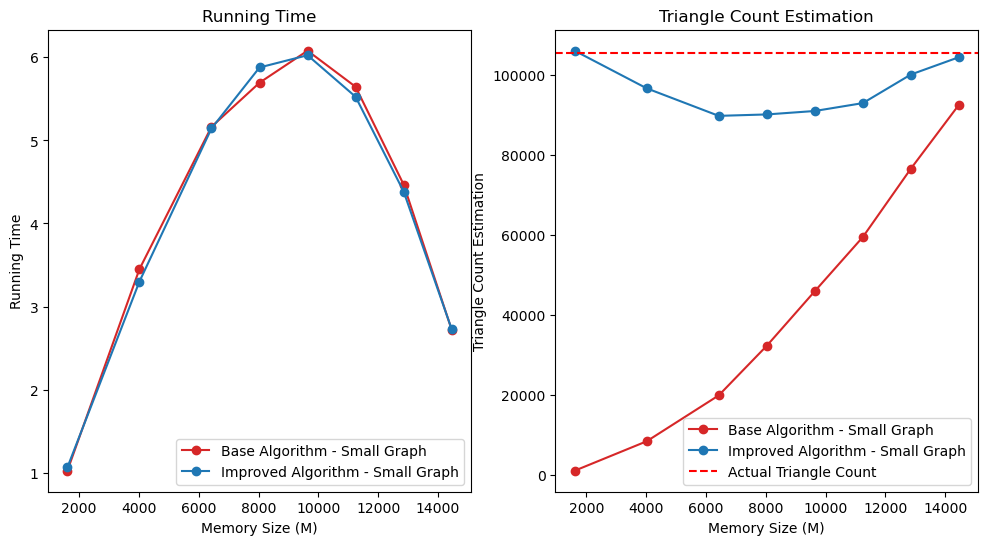

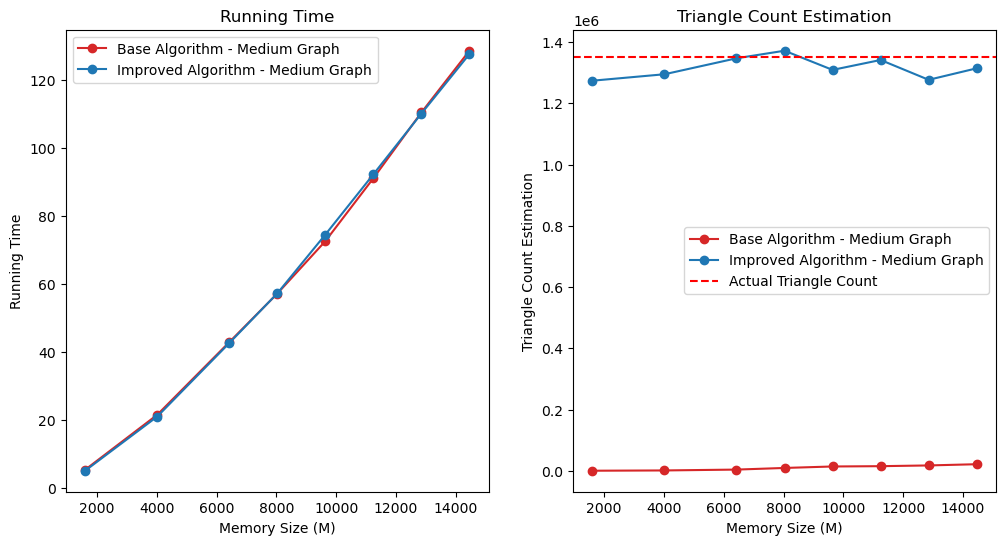

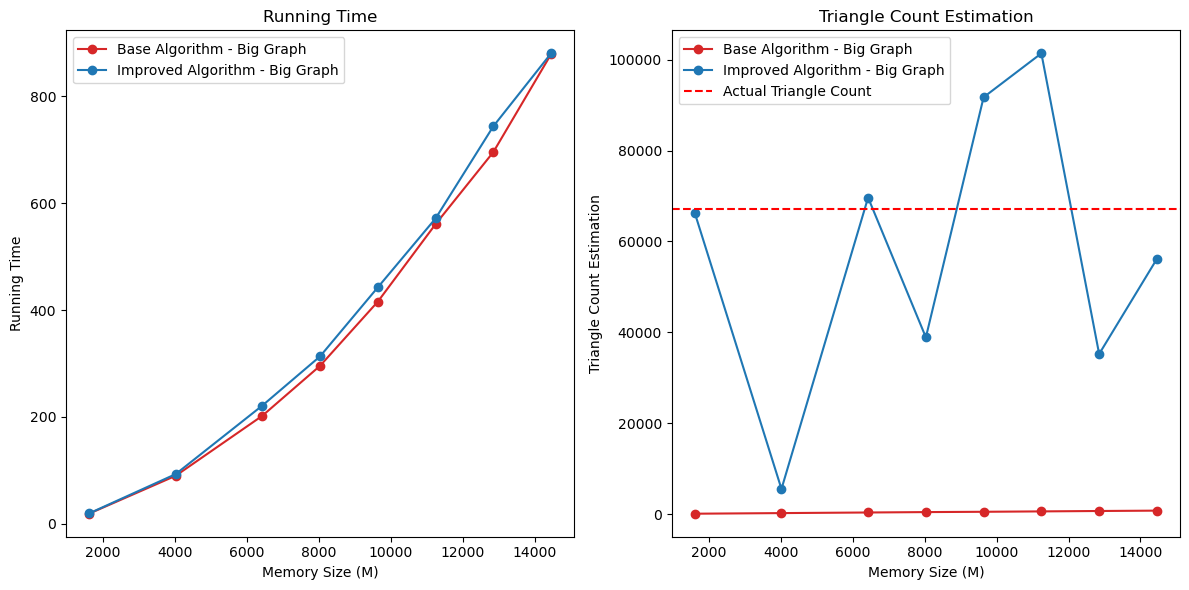

In [33]:
import matplotlib.pyplot as plt

def plot_combined_performance(memory_sizes, running_times_base, 
                              running_times_impr, triangle_estimations_base,
                              triangle_estimations_impr, graph_size):
    plt.figure(figsize=(12, 6))

    # Plot Running Time
    plt.subplot(1, 2, 1)
    plt.plot(memory_sizes, running_times_base, 
             label=f'Base Algorithm - {graph_size} Graph', 
             marker='o', linestyle='-', color='tab:red')
    
    plt.plot(memory_sizes, running_times_impr, 
             label=f'Improved Algorithm - {graph_size} Graph', 
             marker='o', linestyle='-', color='tab:blue')
    
    plt.title('Running Time')
    plt.xlabel('Memory Size (M)')
    plt.ylabel('Running Time')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(memory_sizes, triangle_estimations_base, 
             label=f'Base Algorithm - {graph_size} Graph', 
             marker='o', linestyle='-', color='tab:red')
    plt.plot(memory_sizes, triangle_estimations_impr, 
             label=f'Improved Algorithm - {graph_size} Graph', 
             marker='o', linestyle='-', color='tab:blue')
    plt.axhline(y=105461 if graph_size == 'Small' else (1351441 if graph_size == 'Medium' else 67150), color='red', linestyle='--', label='Actual Triangle Count')  # Corrected line
    plt.title('Triangle Count Estimation')
    plt.xlabel('Memory Size (M)')
    plt.ylabel('Triangle Count Estimation')
    plt.legend()


plot_combined_performance(
    list(loaded_t_base_res_s.keys()),
    [entry[0] for entry in loaded_t_base_res_s.values()],
    [entry[0] for entry in loaded_t_impr_res_s.values()],
    [entry[1] for entry in loaded_t_base_res_s.values()],
    [entry[1] for entry in loaded_t_impr_res_s.values()],
    'Small'
)

plot_combined_performance(
    list(loaded_t_base_res_m.keys()),
    [entry[0] for entry in loaded_t_base_res_m.values()],
    [entry[0] for entry in loaded_t_impr_res_m.values()],
    [entry[1] for entry in loaded_t_base_res_m.values()],
    [entry[1] for entry in loaded_t_impr_res_m.values()],
    'Medium'
)

plot_combined_performance(
    list(loaded_t_base_res_b.keys()),
    [entry[0] for entry in loaded_t_base_res_b.values()],
    [entry[0] for entry in loaded_t_impr_res_b.values()],
    [entry[1] for entry in loaded_t_base_res_b.values()],
    [entry[1] for entry in loaded_t_impr_res_b.values()],
    'Big'
)

plt.tight_layout()
plt.show()